# MEGI001-2101033 Introduction to Earth System Data

## Task 6.2 - Data Handling Analysis (2-D)

Created on: Jan 24, 2019 by Ralph Florent <r.florent@jacobs-university.de>

## T6.2 change histogram bin

* please produce histograms of the above topography over Europe using different bins.
* Considering that the resolution of the topography is about 1.8 km, how much is the area of the imaged part of europe and africa between 0 and 1000 meters of altitude in square kilometers?

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Jan 24 2019

@author: Angelo Rossi, Ralph Florent
"""

# Import relevant libraries
import numpy as np
import xarray as xr
import netCDF4

from matplotlib import pyplot as plt
from PIL import Image
from scipy.interpolate import griddata

# fname = 'http://thredds.ucar.edu/thredds/dodsC/grib/NCEP/GFS/Global_onedeg/Best'  # Remote OPeNDAP Dataset 
filename = '../assets/data/geospatial-raster/etopo1.nc'   # Local NetCDF file

# f = netCDF4.Dataset(filename)

f = xr.open_dataset(filename)
# # dsloc = ds.sel(lon=230.5,lat=55.0,method='nearest')

for v in f.variables: print(v)
print(f.Band1.data)

crs
lat
lon
Band1
[[-1.310e+02 -1.240e+02 -1.210e+02 ...  1.380e+02  1.380e+02  1.370e+02]
 [-1.370e+02 -1.260e+02 -1.230e+02 ...  1.330e+02  1.320e+02  1.390e+02]
 [-1.440e+02 -1.320e+02 -1.250e+02 ...  1.240e+02  1.280e+02  1.310e+02]
 ...
 [-1.084e+03 -1.093e+03 -1.106e+03 ... -3.000e+00 -4.000e+00 -7.000e+00]
 [-1.069e+03 -1.075e+03 -1.086e+03 ... -5.000e+00 -4.000e+00 -9.000e+00]
 [-1.060e+03 -1.063e+03 -1.070e+03 ... -4.000e+00 -2.000e+00 -1.000e+00]]


<Figure size 640x480 with 1 Axes>

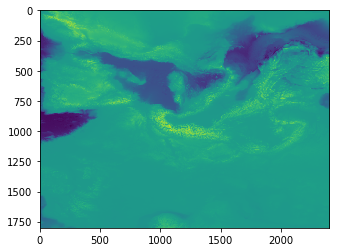

In [2]:
#plotting
plt.imshow(f.Band1.data)
plt.show()

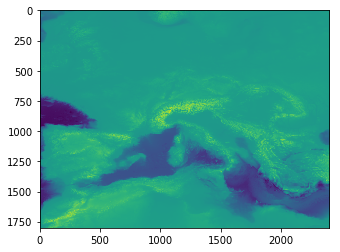

In [3]:
flipped = np.flipud(f.Band1.data)# it's flipped!
#plotting
plt.imshow(flipped)
plt.show()

In [4]:
print("minumum latitude is: ", min(f.Band1.lat.values))

print("maximum latitude is: ", max(f.Band1.lat.values))

print("minumum longitude is: ", min(f.Band1.lon.values))

print("maximum longitude is: ", max(f.Band1.lon.values))

minlon = min(f.Band1.lon.values)
maxlon = max(f.Band1.lon.values)
minlat = min(f.Band1.lat.values)
maxlat = max(f.Band1.lat.values)

minumum latitude is:  30.0
maximum latitude is:  60.0
minumum longitude is:  -10.0
maximum longitude is:  30.0


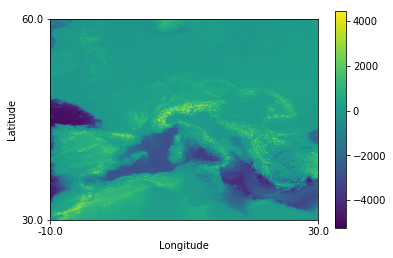

In [5]:
# plot with legend, x an y axis labels
fig, ax = plt.subplots()
#Ticks for y-axis (latitude)
ax.axes.yaxis.set_ticks([0,flipped.shape[0]])
ax.axes.yaxis.set_ticklabels([maxlat,minlat])
plt.ylabel('Latitude')
#Ticks for x-axis (latitude)
ax.axes.xaxis.set_ticks([0,flipped.shape[1]])
ax.axes.xaxis.set_ticklabels([minlon,maxlon])
plt.xlabel('Longitude')
plt.imshow(flipped)
plt.colorbar()

plt.show()

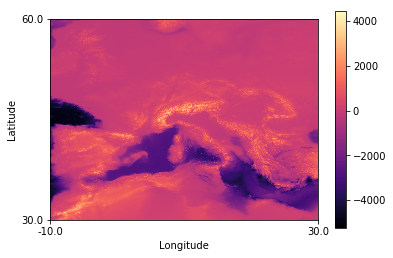

In [6]:
# plot with legend, x an y axis labels
fig, ax = plt.subplots()
# plt.imshow(flipped, cmap='rainbow')
plt.imshow(flipped, cmap='magma')
# plt.imshow(flipped, cmap='viridis') # the default one from above
plt.colorbar()
#Ticks for y-axis (latitude)
ax.axes.yaxis.set_ticks([0,flipped.shape[0]])
ax.axes.yaxis.set_ticklabels([maxlat,minlat])
plt.ylabel('Latitude')
#Ticks for x-axis (latitude)
ax.axes.xaxis.set_ticks([0,flipped.shape[1]])
ax.axes.xaxis.set_ticklabels([minlon,maxlon])
plt.xlabel('Longitude')
plt.show()

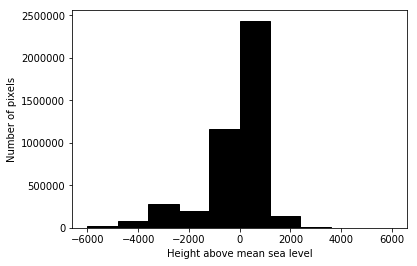

In [7]:
# histogramm of plot
plt.hist(flipped.ravel(), bins=10, range=(-6000, 6000), fc='k', ec='k')
plt.xlabel('Height above mean sea level')
plt.ylabel('Number of pixels')
plt.show()

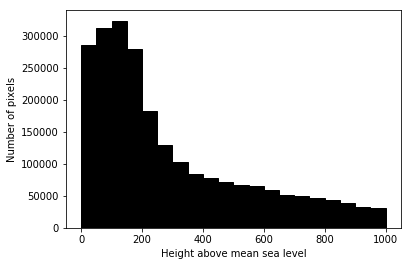

In [8]:
# histogramm of plot
plt.hist(flipped.ravel(), bins=20, range=(0, 1000), fc='k', ec='k')
plt.xlabel('Height above mean sea level')
plt.ylabel('Number of pixels')
plt.show()